# Imports

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.linear_model import LinearRegression

In [8]:
#Q1
df = pd.read_csv('invest.txt',sep=" ",index_col=0)
df.head()

,gnp,invest,cpi,interest
year,,,,
1968,873.4,133.3,82.54,5.16
1969,944.0,149.3,86.79,5.87
1970,992.7,144.2,91.45,5.95
1971,1077.6,166.4,96.01,4.88
1972,1185.9,195.0,100.00,4.50


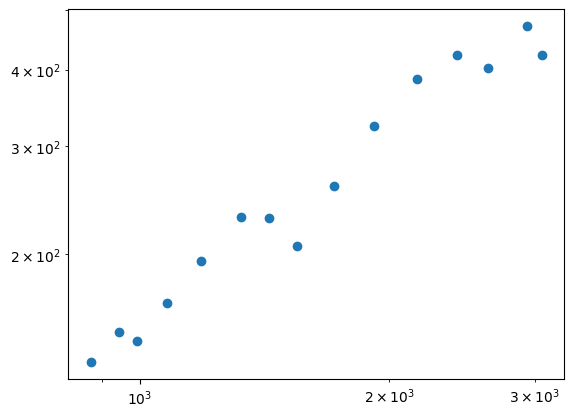

In [25]:
#Q2 
x,y = df[["gnp"]],df[["invest"]]
#x = df[["gnp"]].apply(np.log)
#y = df[["invest"]].apply(np.log)
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [74]:
#Q3
n = len(x)
xl,yl = x.to_numpy().reshape(n),y.to_numpy().reshape(n)
xm, ym = xl.mean(),yl.mean()
xv = xl.var()

b1 = np.cov(xl,yl)[0][1]/xv
b0 = ym - b1*xm

s=0
for i in range(n):
    s+=(yl[i]-b0-b1*xl[i])**2
sigmah = s/(n-2)

b0v = sigmah*(1/n+((xm**2)/xv))
b1v = sigmah/xv

R2 = 1 -(s/np.linalg.norm(yl-ym*np.ones(n))**2)

print("beta coefficients: beta0 = ",b0," beta1 = ",b1)
print("standard deviations of coefficients: beta0 = ",np.sqrt(b0v),"beta1 = ",np.sqrt(b1v))
print("determination coefficient: R² = ",R2)

beta coefficients: beta0 =  -14.32554271979052  beta1 =  0.16603251813009132
standard deviations of coefficients: beta0 =  72.74847950285549 beta1 =  0.041374001814027284
determination coefficient: R² =  0.9415338258055286


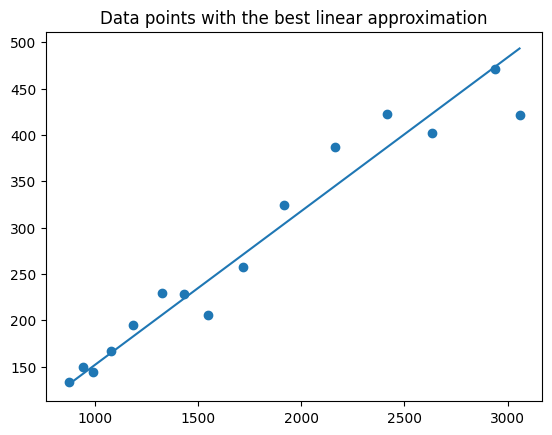

In [76]:
absi = np.linspace(xl[0],xl[-1])
plt.plot(absi,b0+b1*absi)
plt.scatter(x,y)
plt.title("Data points with the best linear approximation")
plt.show()

In [91]:
#Q4
alpha = 0.01
quant = t.ppf(1-alpha/2,n-2)
print(abs(b1/np.sqrt(b1v)) <= quant)
print("The test statistic is equal to ",b1/np.sqrt(b1v),"which is bigger than the quantile",quant )
print("The test result is negative, we reject the hypothesis beta1 = 0, the slope is significant at level",int((1-alpha)*100),"%")
pval = 2*t.sf(1-alpha/2,df=n-2)
print("The p-value is: P(|X|<= quantile) =",pval)

False
The test statistic is equal to  4.01296734302845 which is bigger than the quantile 3.012275838207184
The test result is negative, we reject the hypothesis beta1 = 0, the slope is significant at level 99 %
The p-value is: P(|X|<= quantile) = 0.3378966617500794


In [94]:
#Q5
gnp = 1000
investment = b0+b1*gnp
print("The necessary investment for GNP =",gnp,"is: ",investment)

quant90 = t.ppf(1-0.05,n-2)
CIvar = np.sqrt(sigmah*(1/n+((gnp-xm)**2/xv)))
PIvar = np.sqrt(sigmah*(1+1/n+((gnp-xm)**2/xv)))
print("The confidence interval at level 90","%","is: [",investment-quant90*CIvar,",",investment+quant90*CIvar,"]")
print("The prediction interval at level 90","%","is: [",investment-quant90*PIvar,",",investment+quant90*PIvar,"]")

The necessary investment for GNP = 1000 is:  151.7069754103008
The confidence interval at level 90 % is: [ 95.21851658989426 , 208.19543423070735 ]
The prediction interval at level 90 % is: [ 74.75855843554359 , 228.655392385058 ]


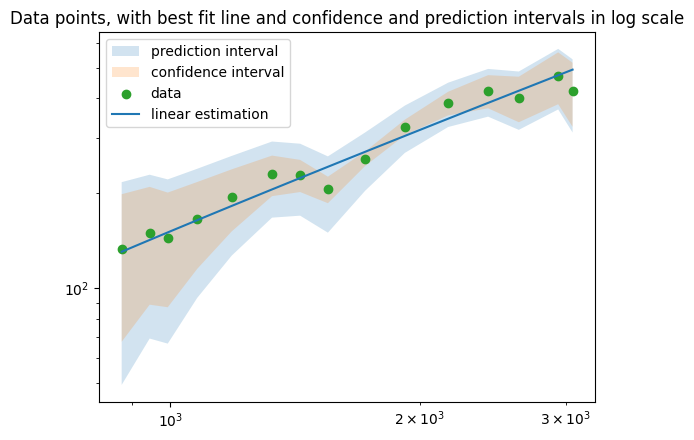

In [108]:
#Q6
def CI(x):
    CIvar = quant90*np.sqrt(sigmah*(1/n+((x-xm)**2/xv)))
    return CIvar

def PI(x):
    PIvar = quant90*np.sqrt(sigmah*(1+1/n+((x-xm)**2/xv)))
    return PIvar

def invest(x):
    return b0+b1*x

plt.fill_between(xl,(yl-[PI(a) for a in xl]), (yl+[PI(a) for a in xl]),alpha = .2, label = 'prediction interval')
plt.fill_between(xl,(yl-[CI(a) for a in xl]), (yl+[CI(a) for a in xl]),alpha = .2, label = 'confidence interval')
plt.scatter(xl,yl,label = "data")
absi = np.linspace(xl[0],xl[-1])
plt.plot(absi,b0+b1*absi,label='linear estimation')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.title("Data points, with best fit line and confidence and prediction intervals in log scale")
plt.show()

In [116]:
#Q7
reg = LinearRegression().fit(xl.reshape((-1,1)),yl)
b0_2 = reg.intercept_
b1_2 = reg.coef_[0]
R2_2 = reg.score(xl.reshape((-1,1)),y)
print("The parameters obtained with sklearn are: beta0=",b0_2,"beta1=",b1_2,"R²=",R2_2)

The parameters obtained with sklearn are: beta0= 5.02993790597327 beta1= 0.15496368358808527 R²= 0.946362204399403


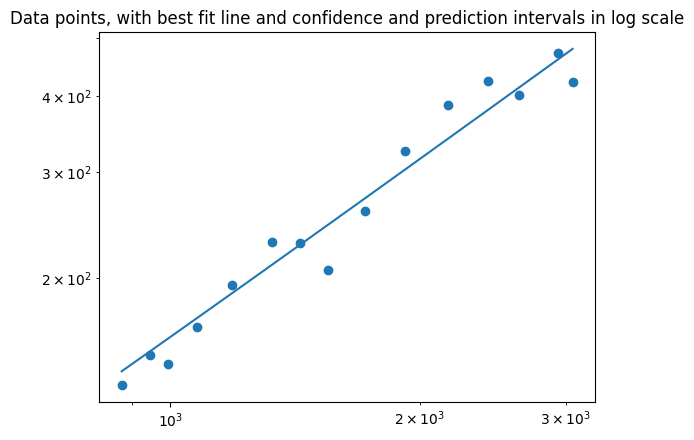

In [117]:
#Q8
plt.scatter(xl,yl,label = "data")
absi = np.linspace(xl[0],xl[-1])
plt.plot(absi,b0_2+b1_2*absi,label='linear estimation')
plt.xscale('log')
plt.yscale('log')
plt.title("Data points, with best fit line and confidence and prediction intervals in log scale")
plt.show()